In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from pandas import Series, DataFrame
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv('data_US_death.csv')
df.head(2)

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,United States,169936,49.4
1,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alabama,2703,53.8


In [3]:
df.shape

(10868, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10868 entries, 0 to 10867
Data columns (total 6 columns):
Year                       10868 non-null int64
113 Cause Name             10868 non-null object
Cause Name                 10868 non-null object
State                      10868 non-null object
Deaths                     10868 non-null int64
Age-adjusted Death Rate    10868 non-null float64
dtypes: float64(1), int64(2), object(3)
memory usage: 509.5+ KB


In [5]:
df.describe(include = 'all')

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
count,10868.000000,10868,10868,10868,1.086800e+04,10868.000000
unique,NaN,11,11,52,NaN,NaN
top,NaN,Diabetes mellitus (E10-E14),Heart disease,Nebraska,NaN,NaN
freq,NaN,988,988,209,NaN,NaN
mean,2008.000000,NaN,NaN,NaN,1.545991e+04,127.563894
std,5.477478,NaN,NaN,NaN,1.128760e+05,223.639771
min,1999.000000,NaN,NaN,NaN,2.100000e+01,2.600000
25%,2003.000000,NaN,NaN,NaN,6.120000e+02,19.200000
50%,2008.000000,NaN,NaN,NaN,1.718500e+03,35.900000
75%,2013.000000,NaN,NaN,NaN,5.756500e+03,151.725000


In [6]:
pd.options.display.float_format = '{:.2f}'.format

In [7]:
df.isnull().sum()

Year                       0
113 Cause Name             0
Cause Name                 0
State                      0
Deaths                     0
Age-adjusted Death Rate    0
dtype: int64

In [8]:
df=df[df['Cause Name']!='All causes']

In [9]:
df['Cause Name'].value_counts()

Heart disease              988
Influenza and pneumonia    988
Diabetes                   988
Kidney disease             988
Cancer                     988
Suicide                    988
Alzheimer's disease        988
Stroke                     988
CLRD                       988
Unintentional injuries     988
Name: Cause Name, dtype: int64

# Total number of records

In [10]:
print('Total number of cases are:', df.shape[0])

Total number of cases are: 9880


# Causes of death in dataset

In [11]:
df['Cause Name'].unique()

array(['Unintentional injuries', "Alzheimer's disease", 'Stroke', 'CLRD',
       'Diabetes', 'Heart disease', 'Influenza and pneumonia', 'Suicide',
       'Cancer', 'Kidney disease'], dtype=object)

In [12]:
Causes = len(df['Cause Name'].unique())
Causes

10

In [13]:
print('There are', Causes, 'causes of death')

There are 10 causes of death


# Total number of deaths in US from 1999 to 2015

In [14]:
new_df = df[df['State']=='United States']
new_df.head(2)

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,United States,169936,49.40
104,2017,Alzheimer's disease (G30),Alzheimer's disease,United States,121404,31.00


In [15]:
df.drop(df.loc[df['State']=='United States'].index, inplace = True)

In [16]:
new_df.shape

(190, 6)

In [17]:
new_df = new_df[(new_df.Year >= 1999) & (new_df.Year <= 2015)]

In [18]:
new_df.groupby('State')['Deaths'].sum()

State
United States    32164933
Name: Deaths, dtype: int64

Total number of deaths in US between 1999 to 2015: 32164933

# Number of deaths per year from 1999 to 2015

In [19]:
new_df.groupby('Year')['Deaths'].sum()

Year
1999    1905826
2000    1902194
2001    1899358
2002    1918873
2003    1912115
2004    1864133
2005    1889981
2006    1854676
2007    1846301
2008    1872981
2009    1838501
2010    1852349
2011    1869321
2012    1876588
2013    1910311
2014    1938408
2015    2013017
Name: Deaths, dtype: int64

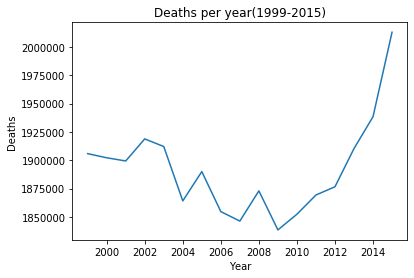

In [20]:
plt.plot(new_df.groupby('Year')['Deaths'].sum())
plt.title('Deaths per year(1999-2015)')
plt.xlabel('Year')
plt.ylabel('Deaths')
plt.show()

# Ten states having highest number of deaths overall

In [21]:
df.groupby('State')['Deaths'].sum().nlargest(10)

State
California        3594261
Florida           2533472
Texas             2367695
New York          2264120
Pennsylvania      1854953
Ohio              1605250
Illinois          1508039
Michigan          1313813
North Carolina    1115953
New Jersey        1030622
Name: Deaths, dtype: int64

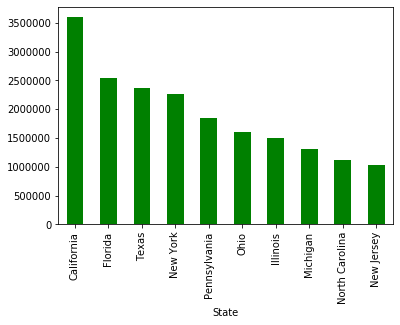

In [22]:
df.groupby('State')['Deaths'].sum().nlargest(10).plot(kind = 'bar', color = 'green')

# Top causes of deaths in the United States during this period

In [23]:
new_df.groupby('Cause Name')['Deaths'].sum().nlargest(5)

Cause Name
Heart disease             10939923
Cancer                     9646498
Stroke                     2437998
CLRD                       2280130
Unintentional injuries     2016510
Name: Deaths, dtype: int64

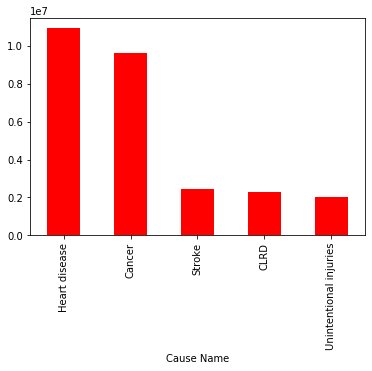

In [24]:
new_df.groupby('Cause Name')['Deaths'].sum().nlargest(5).plot(kind = 'bar', color = 'red')